# Logistic Regression Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [146]:
data = pd.read_excel('C:\\Users\\Galaxy Computers\\Desktop\\Cryotherapy.xlsx');data.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [147]:

data.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [149]:
data.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


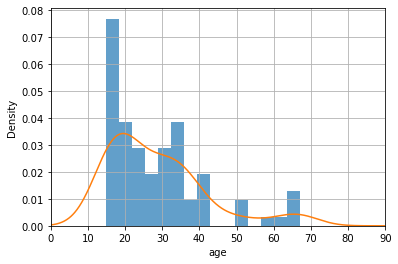

In [150]:
ax = data['age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

data['age'].plot(kind='density')

ax.set(xlabel='age')
plt.xlim(0, 90)
plt.grid()
plt.show()

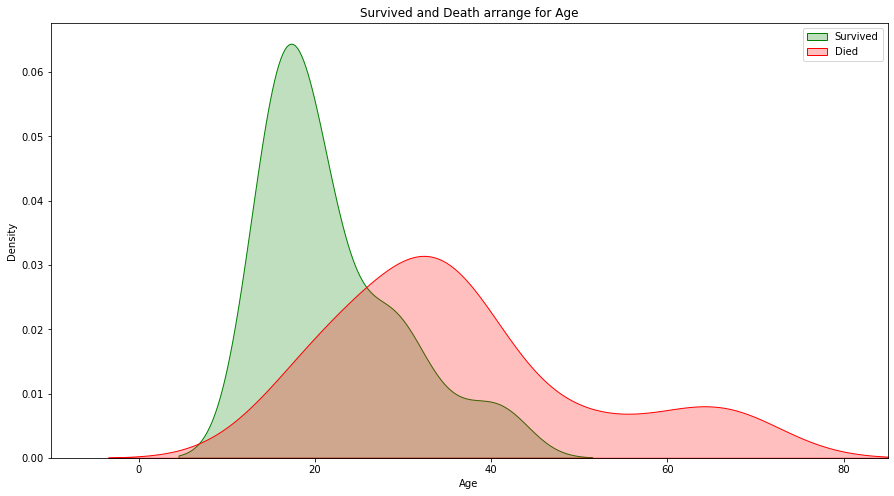

In [151]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["age"][data.Result_of_Treatment == 1], color="green", shade=True)

sns.kdeplot(data["age"][data.Result_of_Treatment == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survived and Death arrange for Age')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


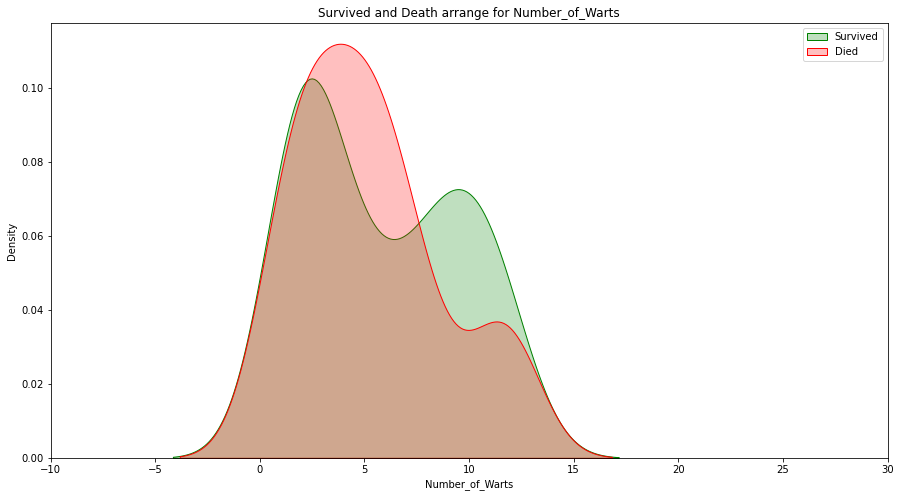

In [152]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["Number_of_Warts"][data.Result_of_Treatment == 1], color="green", shade=True)

sns.kdeplot(data["Number_of_Warts"][data.Result_of_Treatment == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survived and Death arrange for Number_of_Warts')
ax.set(xlabel='Number_of_Warts')
plt.xlim(-10,30)
plt.show()


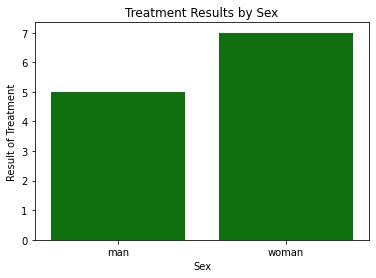

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

sex_labels = ['man', 'woman']
gender = {'sex': [1, 2],
        'Result_of_Treatment': [5, 7]}

sns.barplot('sex', 'Result_of_Treatment', data=gender, color="green")
plt.xticks([0, 1], sex_labels) 
plt.xlabel('Sex')
plt.ylabel('Result of Treatment')
plt.title('Treatment Results by Sex')
plt.show()


In [154]:
data.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


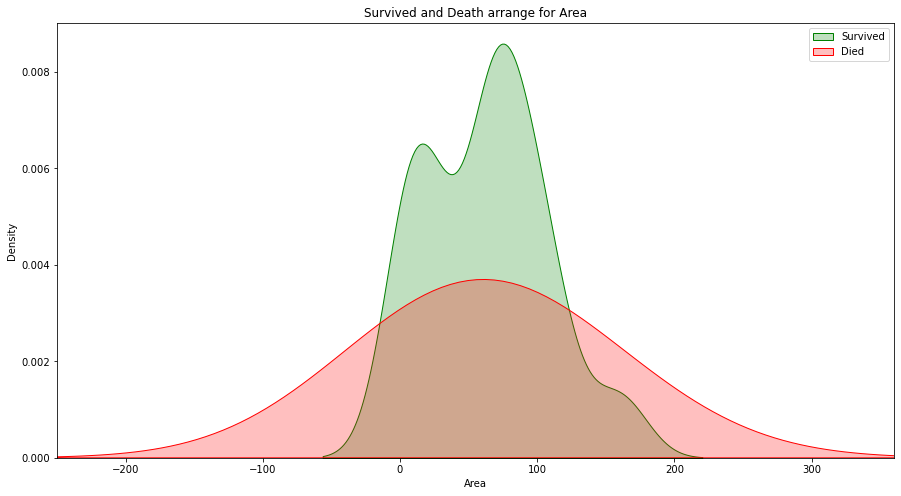

In [155]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["Area"][data.Result_of_Treatment == 1], color="green", shade=True)

sns.kdeplot(data["Area"][data.Result_of_Treatment == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survived and Death arrange for Area')
ax.set(xlabel='Area')
plt.xlim(-250,360)
plt.show()


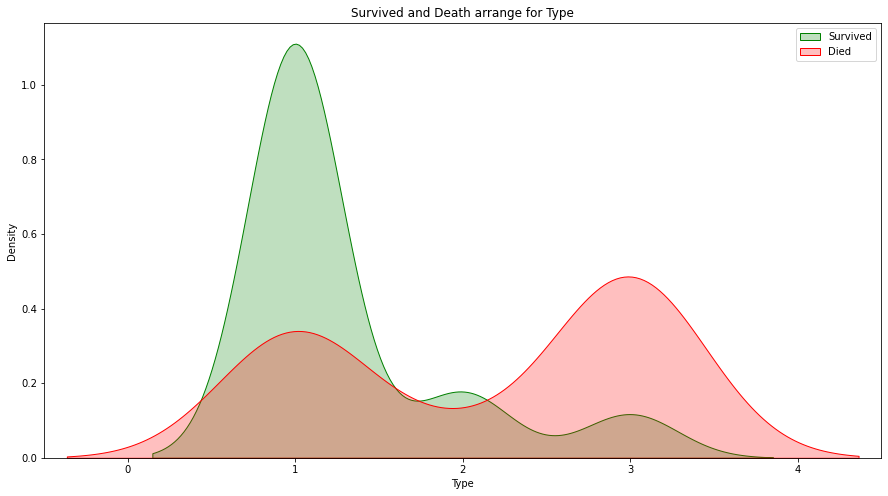

In [156]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["Type"][data.Result_of_Treatment == 1], color="green", shade=True)

sns.kdeplot(data["Type"][data.Result_of_Treatment == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survived and Death arrange for Type')
ax.set(xlabel='Type')
plt.xlim(-0.5,4.5)
plt.show()

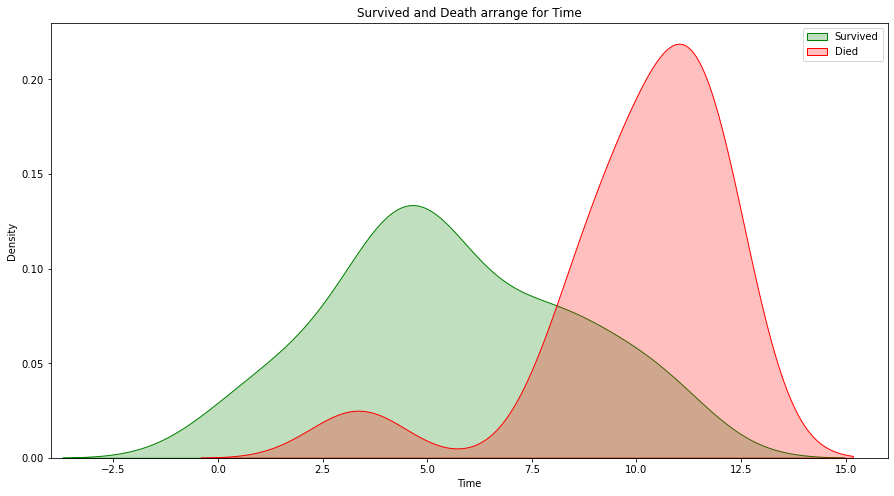

In [157]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["Time"][data.Result_of_Treatment == 1], color="green", shade=True)

sns.kdeplot(data["Time"][data.Result_of_Treatment == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survived and Death arrange for Time')
ax.set(xlabel='Time')
plt.xlim(-4,16)
plt.show()

In [158]:
y = data['Result_of_Treatment']

In [159]:
data.drop('Result_of_Treatment', axis=1, inplace=True)

In [160]:
cols = data.columns

cols

Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area'], dtype='object')

In [161]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data = scaler.fit_transform(data)

In [162]:
type(data)

numpy.ndarray

In [163]:

data = pd.DataFrame(data, columns=[cols])

In [164]:
data.head()

,sex,age,Time,Number_of_Warts,Type,Area
0,0.0,0.384615,1.000000,0.363636,0.0,0.128686
1,0.0,0.269231,0.574468,0.363636,0.0,0.123324
2,0.0,0.673077,0.659574,0.000000,1.0,0.171582
3,0.0,0.326923,0.978723,0.545455,1.0,1.000000
4,0.0,1.000000,0.765957,0.000000,0.0,0.050938


In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=2)

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [169]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [170]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [171]:
logreg.predict_proba(X_test)[:,0]

array([0.15014375, 0.40799841, 0.62759159, 0.2390122 , 0.49701368,
       0.10181855, 0.86250978, 0.45347899, 0.2233891 , 0.56227428,
       0.82641449, 0.53668575, 0.56073319, 0.71292723, 0.86924365,
       0.77261277, 0.26091123, 0.74659256])

In [172]:
logreg.predict_proba(X_test)[:,1]

array([0.84985625, 0.59200159, 0.37240841, 0.7609878 , 0.50298632,
       0.89818145, 0.13749022, 0.54652101, 0.7766109 , 0.43772572,
       0.17358551, 0.46331425, 0.43926681, 0.28707277, 0.13075635,
       0.22738723, 0.73908877, 0.25340744])

In [173]:
from sklearn.metrics import accuracy_score

print("Modelin Accuracy Score'u: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Modelin Accuracy Score'u: 0.6111


In [174]:
accuracy_sklearn = accuracy_score(y_test, y_pred)*100

In [175]:
print('Model Accuracy ' + str(round(accuracy_sklearn, 2)) + ' %.')

Model Accuracy 61.11 %.
